# Análise dos casos de óbito de Covid-19 em Indaiatuba

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from scipy.stats import norm

In [65]:
base = pd.read_excel("CovidIndaiatuba.xlsx")

In [66]:
base.head()

,Obitos,Data,Sexo,Idade,anos,Comorbidade
0,1,2020-03-31,Homem,64,anos,Com comorbidades
1,2,2020-04-13,Mulher,50,anos,Com comorbidades
2,3,2020-04-18,Mulher,52,anos,Sem comorbidade
3,4,2020-04-21,Homem,64,anos,Com comorbidades
4,5,2020-04-24,Mulher,61,anos,Com comorbidades


In [69]:
base.groupby(base['Data'].dt.month)['Obitos'].sum()
base['MesMorte'] = base['Data'].dt.month
base['diferencaDias'] = base['Data'] - base['Data'].min()
base['MédiaMovel'] = base['Obitos'].rolling(2).mean()
base

,Obitos,Data,Sexo,Idade,anos,Comorbidade,MesMorte,diferencaDias,MédiaMovel
0,1,2020-03-31,Homem,64,anos,Com comorbidades,3,0 days,NaN
1,2,2020-04-13,Mulher,50,anos,Com comorbidades,4,13 days,1.5
2,3,2020-04-18,Mulher,52,anos,Sem comorbidade,4,18 days,2.5
3,4,2020-04-21,Homem,64,anos,Com comorbidades,4,21 days,3.5
4,5,2020-04-24,Mulher,61,anos,Com comorbidades,4,24 days,4.5
5,6,2020-05-02,Mulher,83,anos,Com comorbidades,5,32 days,5.5
6,7,2020-05-06,Homem,38,anos,Com comorbidades,5,36 days,6.5
7,8,2020-05-06,Homem,76,anos,Com comorbidades,5,36 days,7.5
8,9,2020-05-07,Homem,30,anos,Com comorbidades,5,37 days,8.5
9,10,2020-05-07,Homem,55,anos,Sem comorbidade,5,37 days,9.5


In [8]:
pd.crosstab(base['Sexo'],base['Sexo'])

Sexo,Mulher,Homem
Sexo,,
Mulher,23,0
Homem,0,34


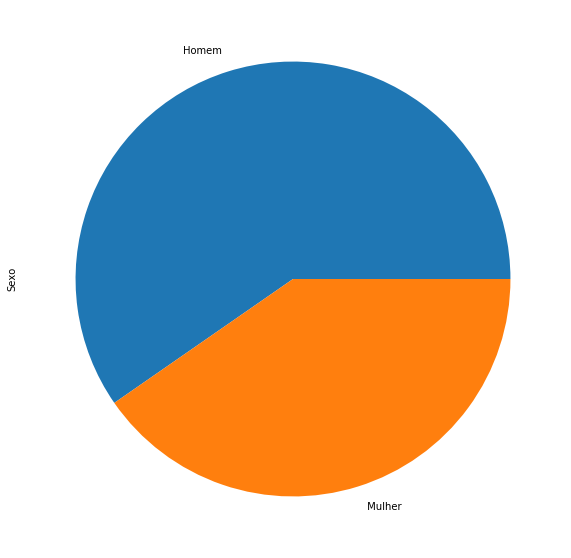

In [9]:
base['Sexo'].value_counts().plot(kind = "pie", figsize = (10,10))

In [10]:
df = base.groupby(base['Data'].dt.month)['Obitos'].count()
df

Data
3     1
4     4
5    22
6    30
Name: Obitos, dtype: int64

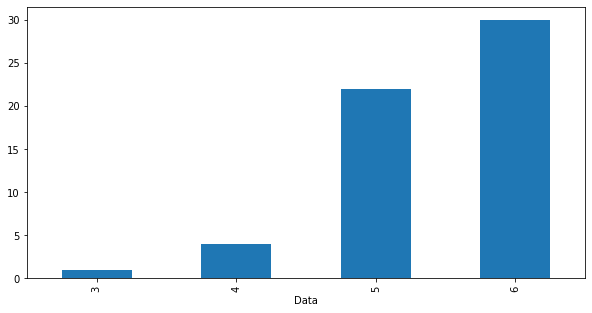

In [83]:
df.plot(kind = "bar", figsize = (10,5))

In [84]:
a = base['diferencaDias'] = base['Data'] - base['Data'].min()
a.tail()

52   83 days
53   83 days
54   85 days
55   85 days
56   86 days
Name: Data, dtype: timedelta64[ns]

In [13]:
pd.crosstab(base['Comorbidade'],base['Comorbidade'])

Comorbidade,Com comorbidades,Sem comorbidade
Comorbidade,,
Com comorbidades,43,0
Sem comorbidade,0,14


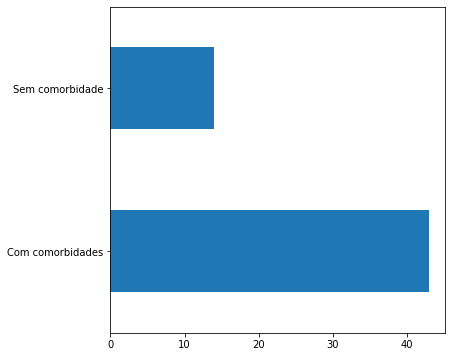

In [14]:
base['Comorbidade'].value_counts().head().plot(kind = "barh", figsize = (6,6))

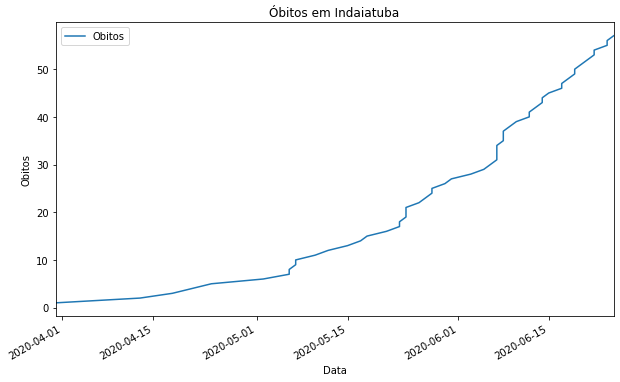

In [15]:
base.plot(x='Data', y='Obitos', figsize=(10,6));
plt.title('Óbitos em Indaiatuba')
plt.ylabel('Obitos')
plt.xlabel('Data')
plt.show()

In [16]:
base['Idade'].mean()

65.24561403508773

In [17]:
base['Idade'].std()

14.618091410687926

In [18]:
base['Idade'].median()

67.0

In [19]:
base['Idade'].mode()

0    67
1    86
dtype: int64

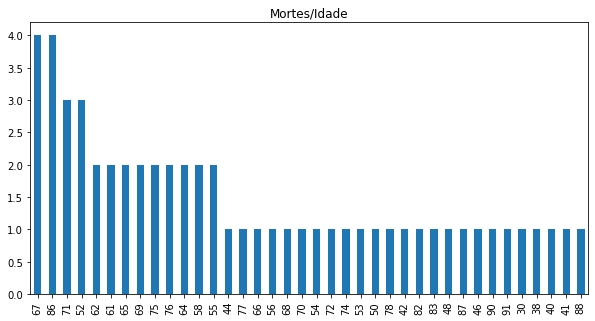

In [20]:
base['Idade'].value_counts().plot(kind='bar',figsize = (10,5), title='Mortes/Idade')

In [21]:
log_returns = np.log(1 + base['Obitos'].pct_change())

In [22]:
base['Obitos'].tail()

52    53
53    54
54    55
55    56
56    57
Name: Obitos, dtype: int64

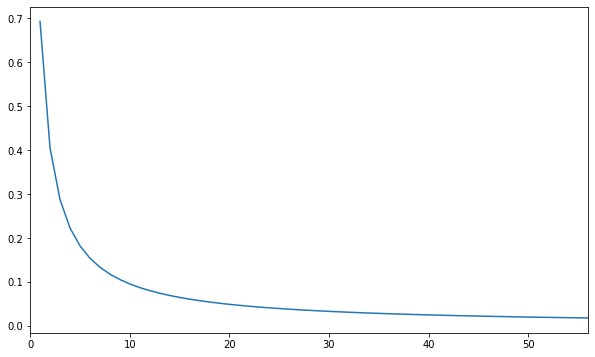

In [24]:
log_returns.plot(figsize=(10,6))

In [25]:
u = log_returns.mean()
u

0.0721973440684741

In [26]:
var = log_returns.var()
var

0.012140871093276887

In [27]:
drift = u - (0.5 * var)
drift

0.06612690852183566

In [28]:
stdev = log_returns.std()
stdev

0.11018562108223054

In [29]:
type(drift)

float

In [30]:
type(stdev)

float

In [31]:
np.array(drift)

array(0.06612691)

In [32]:
drift

0.06612690852183566

In [33]:
stdev

0.11018562108223054

In [34]:
norm.ppf(0.95)

1.6448536269514722

In [35]:
x = np.random.rand(10,2)
x

array([[0.75030627, 0.75190313],
       [0.343546  , 0.46159153],
       [0.82969488, 0.06713685],
       [0.93492491, 0.20264718],
       [0.38655558, 0.38916089],
       [0.77555909, 0.72012139],
       [0.49521864, 0.51787661],
       [0.12422126, 0.3110612 ],
       [0.43872436, 0.43323823],
       [0.56671411, 0.2281612 ]])

In [36]:
norm.ppf(x)

array([[ 0.67545385,  0.68049082],
       [-0.40280457, -0.09642497],
       [ 0.9529602 , -1.49745962],
       [ 1.5135099 , -0.83220302],
       [-0.28830777, -0.28150672],
       [ 0.75728053,  0.58320215],
       [-0.01198537,  0.04482502],
       [-1.15414061, -0.49284459],
       [-0.15420422, -0.16813578],
       [ 0.16801461, -0.74491616]])

In [37]:
z= norm.ppf(np.random.rand(10,4))
z

array([[ 0.34056234,  0.34223784, -0.1659126 ,  0.98430769],
       [-0.29150402, -0.72873962,  1.36278304,  1.27932379],
       [ 0.25856209, -0.35694135, -0.56029461,  0.13305609],
       [ 0.18128105, -1.32758742, -1.57225685,  1.0513249 ],
       [ 0.1812735 ,  0.83296858,  0.1130386 , -0.83604076],
       [ 0.18822952,  0.86158004, -1.31787235,  1.30356586],
       [ 0.92759784, -0.72061622, -0.22789129,  0.75016693],
       [-0.61426513,  0.49357836, -0.89552792, -0.42384674],
       [-1.14445594, -1.69270774, -0.75206976, -1.51278872],
       [ 1.67213389,  0.45505306,  0.30829156, -1.27696367]])

In [38]:
t_intervals = 30
iterations = 10

In [39]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [40]:
daily_returns

array([[0.92879788, 0.9034412 , 1.06967015, 1.13423677, 0.9399556 ,
        1.04023521, 0.99961486, 1.19076436, 1.13206431, 1.21946968],
       [1.1675056 , 1.06798408, 1.09011322, 0.86326002, 1.08302025,
        1.07063996, 1.05076037, 0.97616803, 1.12446399, 1.02738216],
       [1.17430173, 0.97768352, 1.28279065, 0.8974375 , 1.02873712,
        1.07970877, 1.11986796, 1.04815102, 1.31810627, 0.94108621],
       [0.95000325, 1.08212382, 1.13478148, 1.05972647, 1.11421509,
        1.14350933, 0.97569898, 1.00557975, 1.11700994, 0.88259595],
       [1.04065959, 1.05916746, 1.12651802, 1.20940158, 0.88845804,
        1.0483108 , 1.12942335, 1.19318272, 0.99228466, 0.94237755],
       [1.04965048, 1.1033311 , 1.04561869, 0.99962584, 1.06561285,
        1.06281277, 0.94430187, 0.98473705, 1.13625861, 0.75899324],
       [1.1983627 , 0.9707989 , 1.06604554, 1.0504962 , 0.97189433,
        1.39750055, 0.90083733, 0.9703113 , 1.12421057, 1.19708513],
       [1.18018431, 0.95897624, 1.2014503

In [41]:
S0 = base['Obitos'].iloc[-1]
S0

57

In [42]:
price_list = np.zeros_like(daily_returns)

In [43]:
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [44]:
price_list[0] = S0
price_list

array([[57., 57., 57., 57., 57., 57., 57., 57., 57., 57.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [45]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1]* daily_returns[t]

In [46]:
price_list

array([[ 57.        ,  57.        ,  57.        ,  57.        ,
         57.        ,  57.        ,  57.        ,  57.        ,
         57.        ,  57.        ],
       [ 66.54781916,  60.87509271,  62.13645364,  49.20582108,
         61.73215413,  61.02647757,  59.89334119,  55.64157785,
         64.09444769,  58.5607832 ],
       [ 78.14721903,  59.51657488,  79.70806172,  44.15914917,
         63.50615869,  65.89082329,  67.07263374,  58.32077637,
         84.48329362,  55.11074526],
       [ 74.24011187,  64.40430345,  90.45123233,  46.7966192 ,
         70.75952064,  75.34677108,  65.44270048,  58.64619146,
         94.36867866,  48.64052047],
       [ 77.25868447,  68.2149424 , 101.89494328,  56.59590533,
         62.86686497,  78.98683417,  73.9125141 ,  69.97562216,
         93.64059243,  45.83773452],
       [ 81.09461534,  75.26366734, 106.54325722,  56.57472918,
         66.99173892,  83.94821572,  69.79572526,  68.90758798,
        106.39992917,  34.79053044],
       [ 9

In [47]:
price_list.min()

34.79053043882298

In [48]:
price_list.max()

400.1943831483372

In [49]:
price_list.mean()

128.67210738979517

In [50]:
price_list.std()

76.44186020929172

In [51]:
np.median(price_list)

98.71936214797574

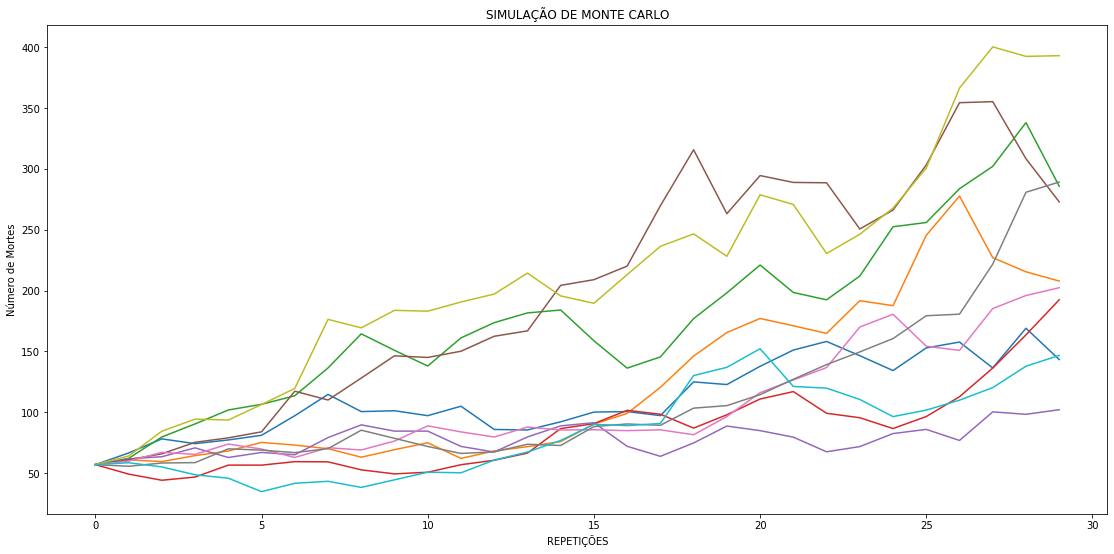

In [52]:
plt.figure(figsize=(19,9))
plt.plot(price_list);
plt.title('SIMULAÇÃO DE MONTE CARLO');
plt.xlabel('REPETIÇÕES'); #definindo nome do eixo X
plt.ylabel('Número de Mortes'); #definindo nome do eixo Y


In [53]:
print(f'Óbitos mínimos, {price_list.min():.0f}'' pessoas')
print(f'Óbitos mediana, {np.median(price_list):.0f}'' pessoas')
print(f'Óbitos médio, {price_list.mean():.0f}'' pessoas')
print(f'Óbitos máximo, {price_list.max():.0f}'' pessoas')
print('Óbitos atual,',(str(round(base['Obitos'].iloc[-1]))),'pessoas') #informar o ticker

Óbitos mínimos, 35 pessoas
Óbitos mediana, 99 pessoas
Óbitos médio, 129 pessoas
Óbitos máximo, 400 pessoas
Óbitos atual, 57 pessoas


In [54]:
S0

57

In [55]:
diferencaDias = base['diferencaDias'] = base['Data'] - base['Data'].min()

In [56]:
d = a.loc[56:].astype('timedelta64[D]')

In [57]:
d

56    86.0
Name: Data, dtype: float64

In [58]:
MortesDia = S0/d

In [59]:
MortesDia

56    0.662791
Name: Data, dtype: float64